In [1]:
print("hello world")

hello world


# Feature Scalling - Standardization

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [13]:
df= pd.read_csv("social_network_ads.csv")

In [7]:
df.sample(5)

,Unnamed: 0,User ID,Gender,Age,EstimatedSalary,Purchased
158,158,15762605,Male,26,30000,0
3,3,15603246,Female,27,57000,0
259,259,15815236,Female,45,131000,1
124,124,15678168,Female,41,51000,0
105,105,15801658,Male,21,72000,0


In [14]:
df=df.iloc[:,3:]
df.sample(5)

,Age,EstimatedSalary,Purchased
31,27,137000,1
98,35,73000,0
30,31,74000,0
116,35,75000,0
393,60,42000,1


In [17]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.1,random_state=0)

In [23]:
scaler = StandardScaler()
# fit the scaler with train data so it will learn the parameters
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
scaler.mean_

array([3.80694444e+01, 6.97166667e+04])

In [29]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_train.columns)

In [34]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,360.0,360.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.3


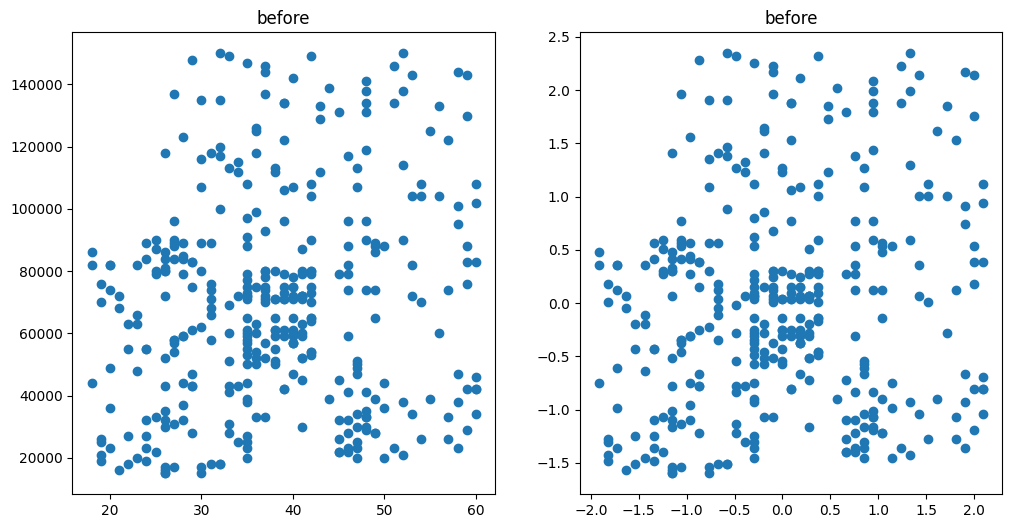

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,6))
ax1.scatter(x_train["Age"],x_train["EstimatedSalary"])
ax1.set_title("before")
ax2.scatter(x_train_scaled["Age"],x_train_scaled["EstimatedSalary"])
ax2.set_title("before")
plt.show()


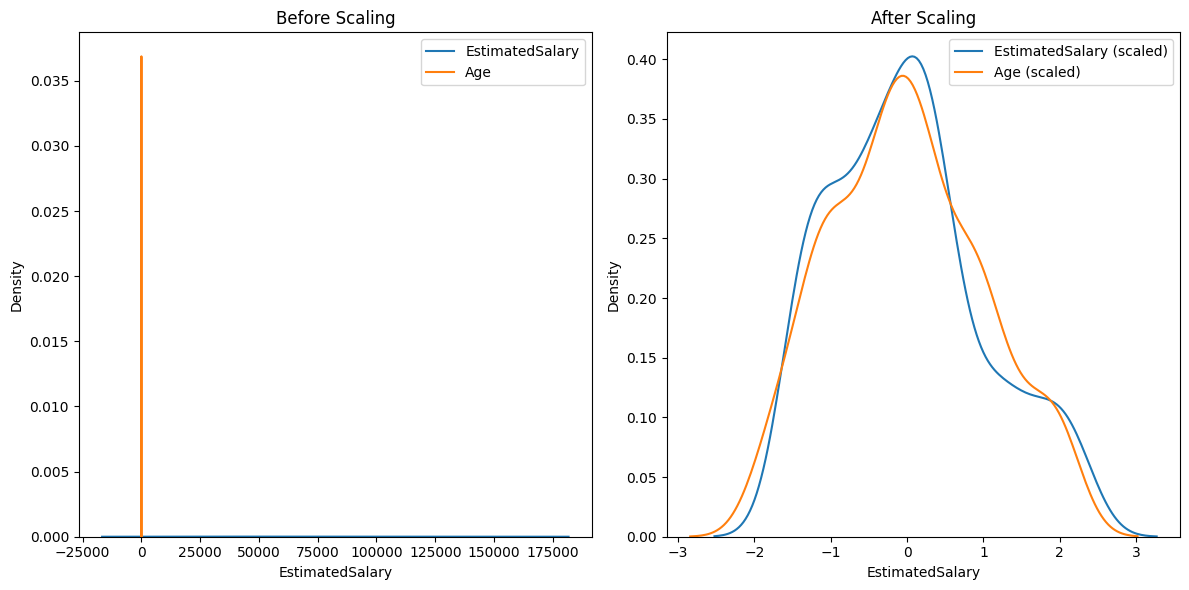

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Before scaling
sns.kdeplot(x_train["EstimatedSalary"], ax=ax1, label="EstimatedSalary")
sns.kdeplot(x_train["Age"], ax=ax1, label="Age")
ax1.set_title("Before Scaling")
ax1.legend()


# After scaling
sns.kdeplot(x_train_scaled["EstimatedSalary"], ax=ax2, label="EstimatedSalary (scaled)")
sns.kdeplot(x_train_scaled["Age"], ax=ax2, label="Age (scaled)")
ax2.set_title("After Scaling")
ax2.legend()

plt.tight_layout()
plt.show()



In [83]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()


In [84]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [88]:
y_predict=lr.predict(x_test)
y_predict_scaled= lr_scaled.predict(x_test_scaled)
y_predict


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [87]:


# Now calculate accuracy
print("actual: ", accuracy_score(y_test, y_predict))
print("scaled : ", accuracy_score(y_test, y_predict_scaled))

actual:  0.95
scaled :  0.95
